In [24]:
#!pip3 install plotnine

In [ ]:
"""
The notebooks contains code for testing different tests based sample data
 0. Basics - Central limit theorem
 1. t-test - one-sample, two-sample, paired
 2. Proportion test 
 3. Chi-Square (Both Goodness of fit and Independence )
 4. Anova 

"""

In [ ]:
"""
Basics Statistics:
1. Data types:
    1. Categorical - Ordinal (Order Matters) and Nominal (Order doesn't matter)
    2. Numerical - Continuous and Discrete

2. Hypothesis testing terminologies:
    1. p-value - likelihood of pattern under null hypothesis

"""

In [ ]:
# student t-test
# 1. one sample t - test => comparing the value with the population parameter
# 2. two sample t - test => comparing if there is differnece between the samples
# 3. paired t-test => Measuring the effect of changes for the same sample group, before/after

In [25]:
import pandas as pd
import numpy as np

from scipy import stats

import plotnine as p9

In [56]:
samplesDf = pd.DataFrame({
    'Sample_A' : np.random.randint(0,100,size = 1000),
    'Sample_B' : np.random.randint(0,100,size = 1000)
})
print('Sample df shape' + str(samplesDf.shape))
samplesDf.head()

Sample df shape(1000, 2)


,Sample_A,Sample_B
0,95,29
1,49,57
2,60,94
3,81,84
4,8,0


In [57]:
# Transform the dataframe from wide to long format
df_long = samplesDf.reset_index().melt(id_vars=['index'], value_vars=['Sample_A', 'Sample_B'],
                                var_name='Sample', value_name='Value')

# Adjusting the output to add an observed_no column for each sample
df_long['observed_no'] = df_long.groupby('Sample').cumcount() + 1
df_long = df_long[['observed_no', 'Sample', 'Value']]
samplesDf = df_long 
# Display the transformed dataframe
print(df_long.head())

   observed_no    Sample  Value
0            1  Sample_A     95
1            2  Sample_A     49
2            3  Sample_A     60
3            4  Sample_A     81
4            5  Sample_A      8


In [58]:
#Generic testing parameters
ALPHA = 0.05




In [59]:
#Theory
#one-sample t-test 

In [60]:
#Code
#one-sample t-test
Sample_A = samplesDf.loc[samplesDf.Sample == 'Sample_A','Value']
t_result = stats.ttest_1samp(Sample_A,70)
if t_result[1] < ALPHA:
    print('Sample mean != Population Mean')
else: 
    print('Not enough evidence to reject the null hypothesis')
    print(t_result)


Sample mean != Population Mean


In [61]:
#Theory
#two-sample t-test independent

Not enough evidence to reject the null hypothesis
Ttest_indResult(statistic=-1.3935700293294093, pvalue=0.1636024731247799)


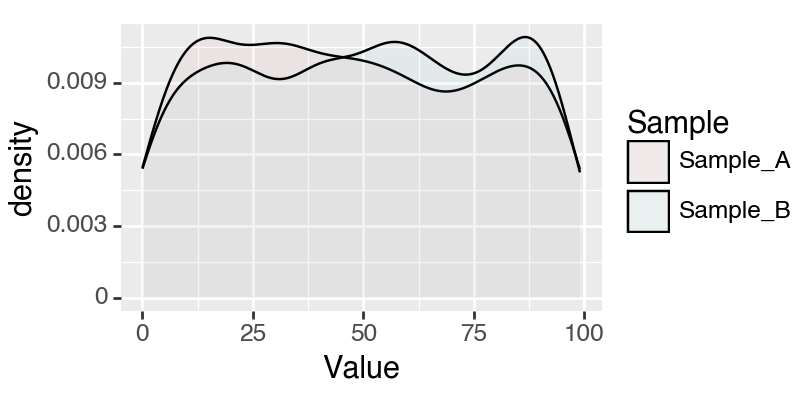

In [62]:
#Code
#two-sample t-test independent
Sample_A = samplesDf.loc[samplesDf.Sample == 'Sample_A','Value']
Sample_B = samplesDf.loc[samplesDf.Sample == 'Sample_B','Value']
t_result = stats.ttest_ind(Sample_A,Sample_B)
if t_result[1] < ALPHA:
    print('Sample mean != Population Mean')
else:
    print('Not enough evidence to reject the null hypothesis')
    print(t_result)

print(p9.ggplot(samplesDf) 
      + p9.aes(x='Value',fill='Sample')
       + p9.geom_density(alpha = ALPHA) 
       + p9.theme(figure_size=(4,2))
       )

In [63]:
#Theory
# Paired t-test / Before vs After comparison


There is no statistical evidence to prove the difference in performance
TtestResult(statistic=-1.3786581336433776, pvalue=0.1683088112545976, df=999)


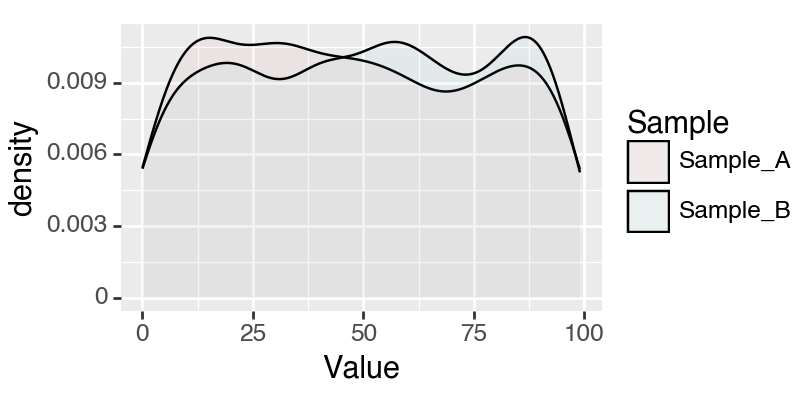

In [64]:
#Code
# Paired t-test / Before vs After comparison
Sample_A = samplesDf.loc[samplesDf.Sample == 'Sample_A','Value']
Sample_B = samplesDf.loc[samplesDf.Sample == 'Sample_B','Value']
t_result = stats.ttest_rel(Sample_A,Sample_B)
if t_result[1] < ALPHA:
    print('There is statistical evidence for the difference')
else:
    print('There is no statistical evidence to prove the difference in performance')
    print(t_result)

print(p9.ggplot(samplesDf) 
      + p9.aes(x='Value',fill='Sample')
       + p9.geom_density(alpha = ALPHA) 
       + p9.theme(figure_size=(4,2))
       )

In [65]:
# Tests for Categorical value - (Head/Tail, Success/Failure)
# 1. ChiSquare Test - Goodness of fitness 
# 2. Fisher Extract - Checking if both the samples are from same population/distribution

In [66]:
#Theory

In [67]:
#Code
# 1. ChiSquare Test
# Usecases: Checking if the coin is fair/not, Checking if the observed male/female ratio

#Generating Coin flip data
df = pd.DataFrame({
    'FlipNo': list(np.arange(1000)),
    'Result': ['Head' if np.random.rand(1) > 0.5 else 'Tail' for i in np.arange(1000)]
})
df.head()

chi = stats.chisquare(df['Result'].value_counts())
print('The results from ChiSquare: \n' + str(chi))
if chi[1] < ALPHA:
    print(' The sample data is from different distribution')
else:
    print("No Statiscally provable difference")

The results from ChiSquare: 
Power_divergenceResult(statistic=3.136, pvalue=0.07658140903567008)
No Statiscally provable difference


In [68]:
#Theory
#2. Fisher Extact Test

In [69]:
#Code
# 2. Fisher Extact Test
# To check if both samples are from same distribution or not
#Generating Coin flip data
df = pd.DataFrame({
    'FlipNo': list(np.arange(1000)),
    'Coin1': ['Head' if np.random.rand(1) > 0.5 else 'Tail' for i in np.arange(1000)],
    'Coin2': ['Head' if np.random.rand(1) > 0.5 else 'Tail' for i in np.arange(1000)]
})
df.head()

fisher = stats.fisher_exact(pd.crosstab(df['Coin1'],df['Coin2']))
print(fisher)

if fisher[1] < ALPHA:
    print('There is statistical evidence to prove different distribution/source')
else:
    print('There is no statistical evidence to prove the distribution')

SignificanceResult(statistic=0.9096984340592121, pvalue=0.4863298413857806)
There is no statistical evidence to prove the distribution


In [ ]:
#Theory
#ANOVA
"""
- Analysis of variance
- Generalize the t-test to broader set
- Simulatenours comparison of different variable/level

Hypothesis Testing:
    Null Hypothesis : There is no significant difference among the groups
    Alternate Hypothesis : There is a significant difference among the groups

    F Value  = Variance between the groups / Variance within the groups
    Larger the F value, Higher the variance between the groups

Assumptions:
1. Homogenity of variance among the groups - Appx equal variance among the groups
2. Normality of residual terms (predicted - actual)
3. Samples are picked independent fo each other


one-way Anova
- single factor with 2-3 levels
- More than 1 variants (Control, Treatment 1, Treatment 2)

Two-way Anova
- two factor with 2-3 levels
- Effect of these factors on variants
"""


In [74]:
df = pd.read_csv('data/covid_19_india.csv', parse_dates=['Date'])
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [90]:
df.columns = ['Sno', 'Date', 'Time', 'State_UT','ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured','Deaths', 'Confirmed']

In [123]:
import statsmodels as sm
import matplotlib.pyplot as plt

In [82]:
#Running one-way anova using stats package
tn_confirmed = df[df.State_UT == 'Tamil Nadu'].Confirmed
ker_confirmed = df[df.State_UT == 'Kerala'].Confirmed
up_confirmed = df[df.State_UT == 'Uttar Pradesh'].Confirmed
aov_table = stats.f_oneway(tn_confirmed,ker_confirmed,up_confirmed)
print(aov_table)
if aov_table[1] < ALPHA:
    print('There is statistical evidence for difference in the variance between the groups')
else:
    print('No statistical evidence to prove the difference')


F_onewayResult(statistic=13.72476508051812, pvalue=1.2296342817943142e-06)
There is statistical evidence for difference in the variance between the groups


In [105]:
df_sub = df[df.State_UT.isin(['Tamil Nadu','Kerala','Uttar Pradesh'])]
df_sub.Confirmed.fillna(method='ffill')
print(df_sub.columns)

Index(['Sno', 'Date', 'Time', 'State_UT', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')


In [104]:
#Running one-way anova using statsmodels package
formula = "Confirmed ~ C(State_UT)"
model = sm.formula.api.ols(formula,df_sub).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     13.72
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.23e-06
Time:                        16:25:29   Log-Likelihood:                -24191.
No. Observations:                1609   AIC:                         4.839e+04
Df Residuals:                    1606   BIC:                         4.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     8.195e+05   3.46e+04     23.653      0.000    7.52e+05    8.87e+05
C(State_UT)[T.Tamil Nadu]     6392.3471   4.99e+04      0.128      0.898   -9.14e+04    1.04e+05
C(State_UT)[T.Uttar Pradesh] -2.251e+05   4.98e+04     -4.522      0.000   -3.23e+05   -1.27e+05
==============================================================================
Omnibus:                      296.165   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.702
Skew:                           1.253   Prob(JB):                    1.86e-104
Kurtosis:                       3.917   Cond. No.                         3.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
aov_table = sm.api.stats.anova_lm(model,typ=2)
print(aov_table)

                   sum_sq      df          F    PR(>F)
C(State_UT)  1.845065e+13     2.0  13.724765  0.000001
Residual     1.079499e+15  1606.0        NaN       NaN


In [103]:
# Post Hoc Test
# Tukey HSD Test
mc = sm.stats.multicomp.MultiComparison(df_sub['Confirmed'],df_sub['State_UT'])
results = mc.tukeyhsd()
print(results)


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
  group1       group2      meandiff   p-adj    lower        upper     reject
----------------------------------------------------------------------------
    Kerala    Tamil Nadu    6392.3471 0.991 -110561.2309  123345.9251  False
    Kerala Uttar Pradesh -225129.3319   0.0 -341910.3265 -108348.3374   True
Tamil Nadu Uttar Pradesh  -231521.679   0.0 -350286.5962 -112756.7619   True
----------------------------------------------------------------------------


In [ ]:
#Two-way Anova test and tukey multicomparison

In [108]:
# Seed for reproducibility
np.random.seed(42)

# Sample sizes
n_groups = 3  # Number of groups for factor A (Teaching Method)
n_levels = 2  # Number of levels for factor B (Student Background)
n_samples = 50  # Number of samples per group/level combination

# Generating random data
data = {
    'Teaching_Method': np.repeat(['A', 'B', 'C'], n_samples * n_levels),
    'Student_Background': np.tile(np.repeat(['X', 'Y'], n_samples), n_groups),
    'Exam_Score': np.random.normal(75, 10, n_groups * n_levels * n_samples) + 
                  np.tile(np.repeat([0, 5, 10], n_samples * n_levels), 1)  # Adding some differences
}

df = pd.DataFrame(data)
df.head()

,Teaching_Method,Student_Background,Exam_Score
0,A,X,79.967142
1,A,X,73.617357
2,A,X,81.476885
3,A,X,90.230299
4,A,X,72.658466


In [117]:
formula = 'Exam_Score ~ C(Teaching_Method) + C(Student_Background) + C(Teaching_Method):C(Student_Background)'
model = sm.formula.api.ols(formula, data =df).fit()
aov_table = sm.stats.api.anova_lm(model, typ=2)
print(pd.DataFrame(aov_table))

                                                sum_sq     df          F   
C(Teaching_Method)                         6841.435284    2.0  35.227712  \
C(Student_Background)                        31.458112    1.0   0.323966   
C(Teaching_Method):C(Student_Background)    228.495800    2.0   1.176564   
Residual                                  28548.291310  294.0        NaN   

                                                PR(>F)  
C(Teaching_Method)                        1.928982e-14  
C(Student_Background)                     5.696683e-01  
C(Teaching_Method):C(Student_Background)  3.097840e-01  
Residual                                           NaN  


In [118]:
mc = sm.stats.multicomp.MultiComparison(df['Exam_Score'],df['Teaching_Method'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B   6.2615    0.0 2.9807  9.5423   True
     A      C  11.6874    0.0 8.4066 14.9683   True
     B      C   5.4259 0.0004 2.1451  8.7067   True
---------------------------------------------------


In [119]:
mc = sm.stats.multicomp.MultiComparison(df['Exam_Score'],df['Student_Background'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     X      Y   0.6476 0.6083 -1.8367 3.132  False
--------------------------------------------------


In [ ]:
#Validating the assumptions for Anova

0.9938966035842896 0.2688046097755432


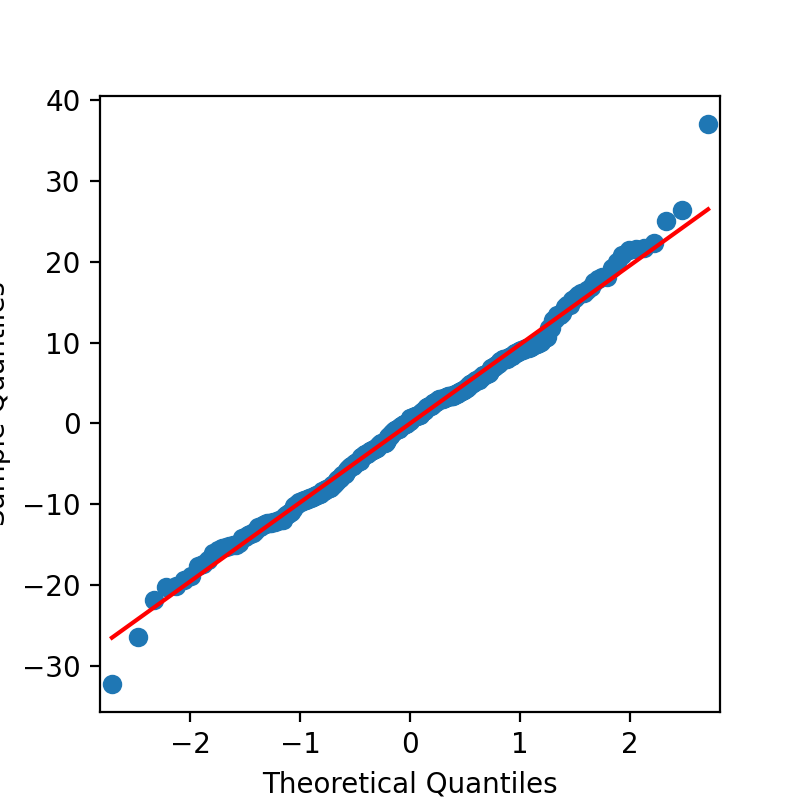

In [127]:
# Check for Normality
#1. Shapiro Wil Test 
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

#Q-Q Plot for residuals
res = model.resid
fig = sm.api.qqplot(res, line='s')
fig.set_size_inches(4,4)
plt.show()